Data Visualization
===
---
1. Problem Set 2: Hypothesis testing
2. Introduction to ggplot2
3. AEA chart of the week - March 19, 2019: Replication 
4. Self-practice
---

In [1]:
setwd("/Users/tino/Desktop/TA-Econometrics-II/notebooks_R")
library(tidyverse)
hprice <- read.csv("hprice.csv")

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.4.0
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘dplyr’ was built under R version 3.5.1”Warning message:
“package ‘stringr’ was built under R version 3.5.2”─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


---
## 1. Hypothesis testing
* package "car" for function linearHypothesis( ).
* package "sandwich" for function vcovHC( ), which can create robust standard errors as Stata.
* reg <- lm(y ~ x1 + x2 + x3 + x4, data = data_var)
* linearHypothesis(reg, "beta = 0", vcov = vcovHC(reg, "HC1"))
* linearHypothesis(reg, "beta1 - beta2 = 0", vcov = vcovHC(reg, "HC1"))

In [82]:
install.packages("car")
library(car)


The downloaded binary packages are in
	/var/folders/xj/2zqx0dxn52d5778tkr7r6rp00000gn/T//RtmpMha2Zv/downloaded_packages


Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some



In [80]:
hprice <- read.csv("hprice.csv")
reg <- lm(price ~ bdrms + lotsize + sqrft + colonial, data = hprice)
summary(reg)


Call:
lm(formula = price ~ bdrms + lotsize + sqrft + colonial, data = hprice)

Residuals:
    Min      1Q  Median      3Q     Max 
-123.52  -36.12   -5.31   28.56  216.50 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.248e+01  2.702e+01  -0.832 0.407370    
bdrms        1.137e+01  8.666e+00   1.313 0.192428    
lotsize      2.143e-03  6.082e-04   3.523 0.000655 ***
sqrft        1.232e-01  1.240e-02   9.938  < 2e-16 ***
colonial     1.100e+01  1.317e+01   0.835 0.405614    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.11 on 96 degrees of freedom
Multiple R-squared:  0.6725,	Adjusted R-squared:  0.6589 
F-statistic: 49.29 on 4 and 96 DF,  p-value: < 2.2e-16


In [88]:
library(sandwich)
linearHypothesis(reg, "bdrms = 0", vcov = vcovHC(reg, "HC1"))

Res.Df,Df,F,Pr(>F)
97,NA,NA,NA
96,1,1.752768,0.1886729


In [89]:
linearHypothesis(reg, "lotsize = 0", vcov = vcovHC(reg, "HC1"))

Res.Df,Df,F,Pr(>F)
97,NA,NA,NA
96,1,2.640417,0.107455


In [90]:
linearHypothesis(reg, "bdrms - colonial = 0", vcov = vcovHC(reg, "HC1"))

Res.Df,Df,F,Pr(>F)
97,NA,NA,NA
96,1,0.0003617237,0.9848654


---
## 2. Introduction to ggplot2
* ggplot
* aesthetic mappings
* geometric objects

In [51]:
hprice$colonial <- as.character(hprice$colonial)
summary(hprice)

       id          price           bdrms          lotsize          sqrft     
 Min.   :  1   Min.   :111.0   Min.   :2.000   Min.   : 1000   Min.   :1171  
 1st Qu.: 26   1st Qu.:230.0   1st Qu.:3.000   1st Qu.: 5625   1st Qu.:1656  
 Median : 51   Median :264.0   Median :3.000   Median : 6400   Median :1835  
 Mean   : 51   Mean   :288.3   Mean   :3.545   Mean   : 8755   Mean   :1981  
 3rd Qu.: 76   3rd Qu.:316.0   3rd Qu.:4.000   3rd Qu.: 8460   3rd Qu.:2124  
 Max.   :101   Max.   :725.0   Max.   :7.000   Max.   :92681   Max.   :3880  
   colonial        
 Length:101        
 Class :character  
 Mode  :character  
                   
                   
                   

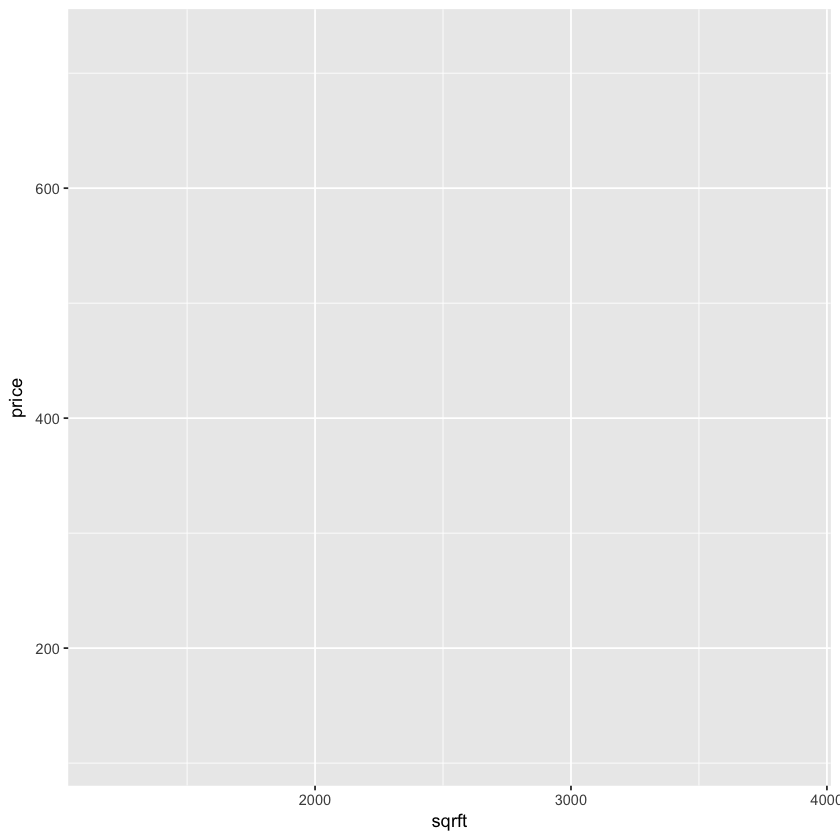

In [33]:
ggplot(aes(x = sqrft, y = price), data = hprice)

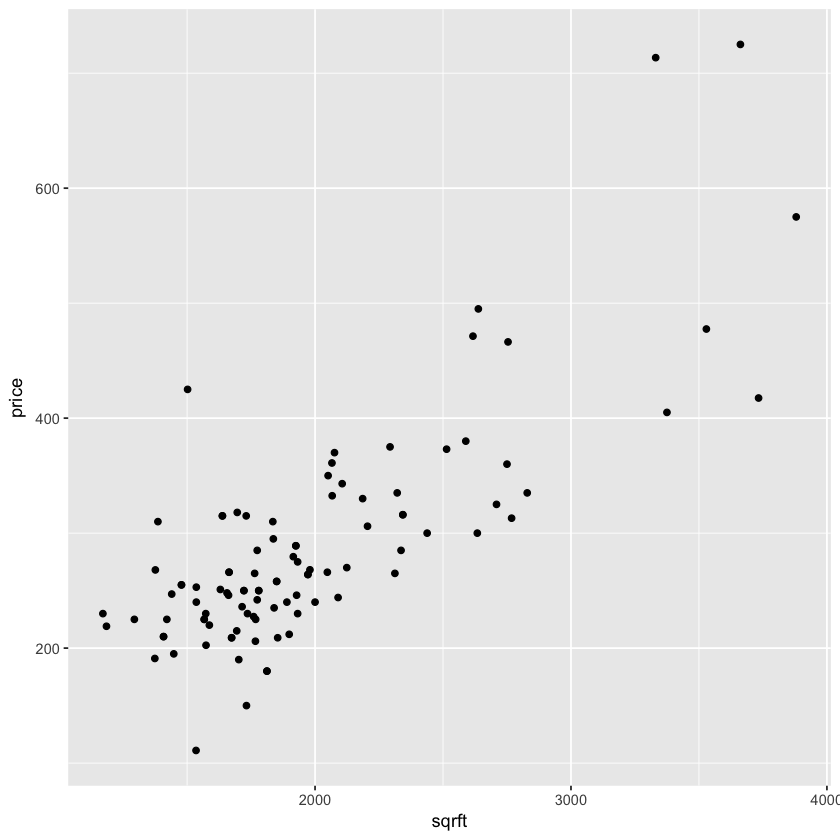

In [34]:
ggplot(aes(x = sqrft, y = price), data = hprice) +
    geom_point()

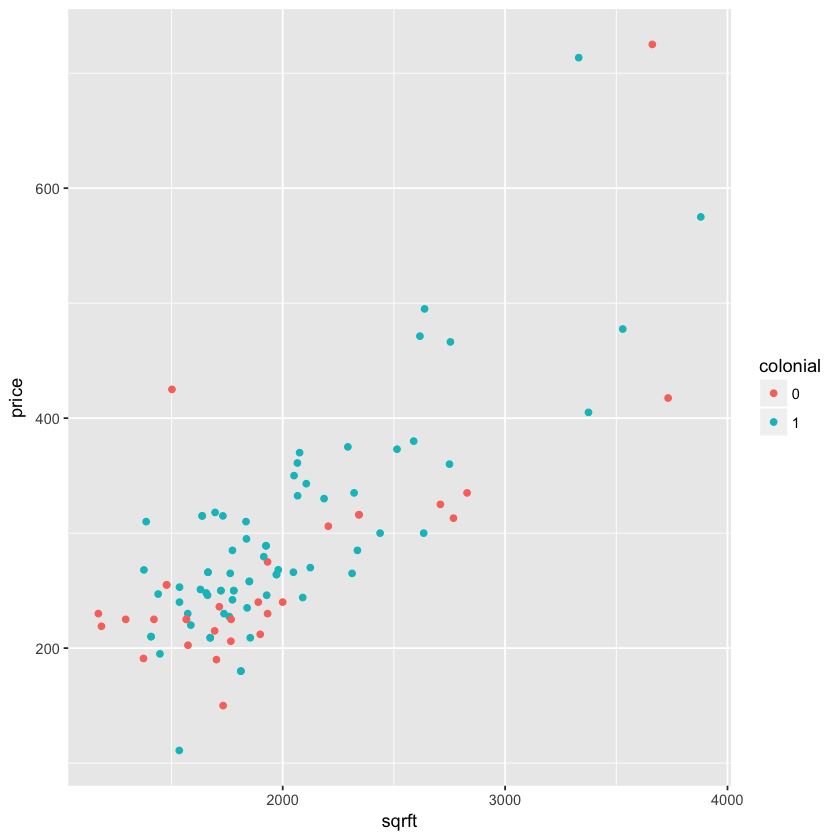

In [52]:
ggplot(aes(x = sqrft, y = price, color = colonial), data = hprice) +
    geom_point()

`geom_smooth()` using method = 'loess'


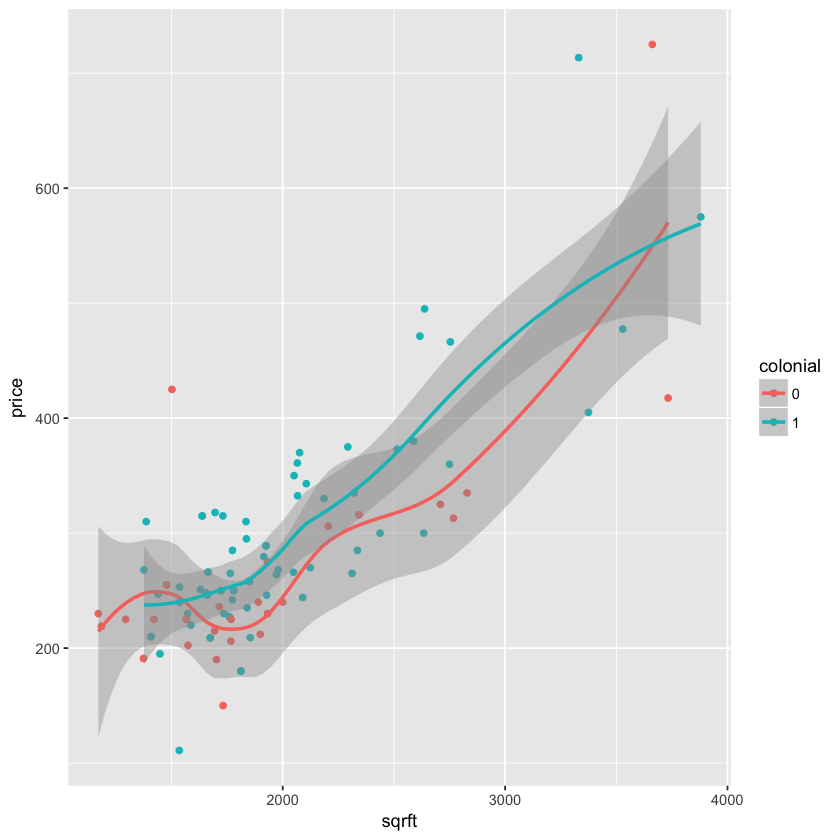

In [53]:
ggplot(aes(x = sqrft, y = price, color = colonial), data = hprice) +
    geom_point() + 
    geom_smooth()

`geom_smooth()` using method = 'loess'


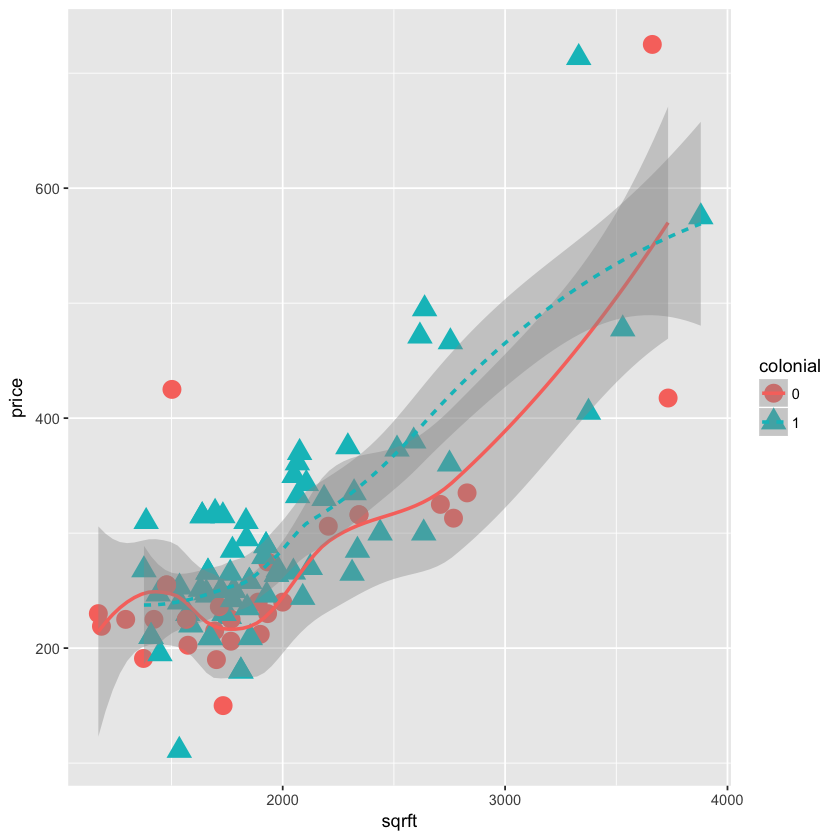

In [63]:
ggplot(aes(x = sqrft, y = price, color = colonial, shape = colonial, linetype = colonial), data = hprice) +
    geom_point(size = 5) + 
    geom_smooth()

---
## 3. AEA chart of the week - March 19, 2019: Replication
* You can access the article in [HERE](https://www.aeaweb.org/articles?id=10.1257/aer.20180044).
  * Step 1: create the variables we need
  * Step 2: create a canvas and specify the aesthetic mapping
  * Step 3: add the geometic objects
  * Step 4: adjust the x-axis and y-axis
  * Step 5: set the color, shape and linetype
  * Step 6: change the theme
  * Step 7: several minor adjustments

In [68]:
aea <- read.csv("aea.csv")
summary(aea)

     school          grade                  treatedClassroom Discriminated50 
 Min.   :1.000   Min.   :2.000   Treated Classroom  :116     Min.   :0.0000  
 1st Qu.:1.000   1st Qu.:2.000   Untreated Classroom:226     1st Qu.:0.0000  
 Median :1.000   Median :3.000                               Median :0.0000  
 Mean   :1.398   Mean   :3.418                               Mean   :0.3186  
 3rd Qu.:2.000   3rd Qu.:4.000                               3rd Qu.:1.0000  
 Max.   :2.000   Max.   :5.000                               Max.   :1.0000  
                                                             NA's   :229     
 Discriminated200 Discriminated500  Discriminated   hasPoorPartner  
 Min.   :0.0000   Min.   :0.00000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :0.0000   Median :0.00000   Median :0.000   Median :0.0000  
 Mean   :0.1981   Mean   :0.06504   Mean   :0.193   Mean   :0.1667  
 3rd Qu.:0.0000   3rd Qu.:0.000

In [69]:
# Step 1: create the variables we need

aea <- aea %>%
  group_by(treatedClassroom, Prize) %>%
  mutate(mean_Discriminated = mean(Discriminated),
         sd_Discriminated = sd(Discriminated),
         n = n(),
         hi_Discriminated = mean_Discriminated + qt(0.025, n-1)*(sd_Discriminated / sqrt(n)),
         lo_Discriminated = mean_Discriminated - qt(0.025, n-1)*(sd_Discriminated / sqrt(n))) %>%
  ungroup()

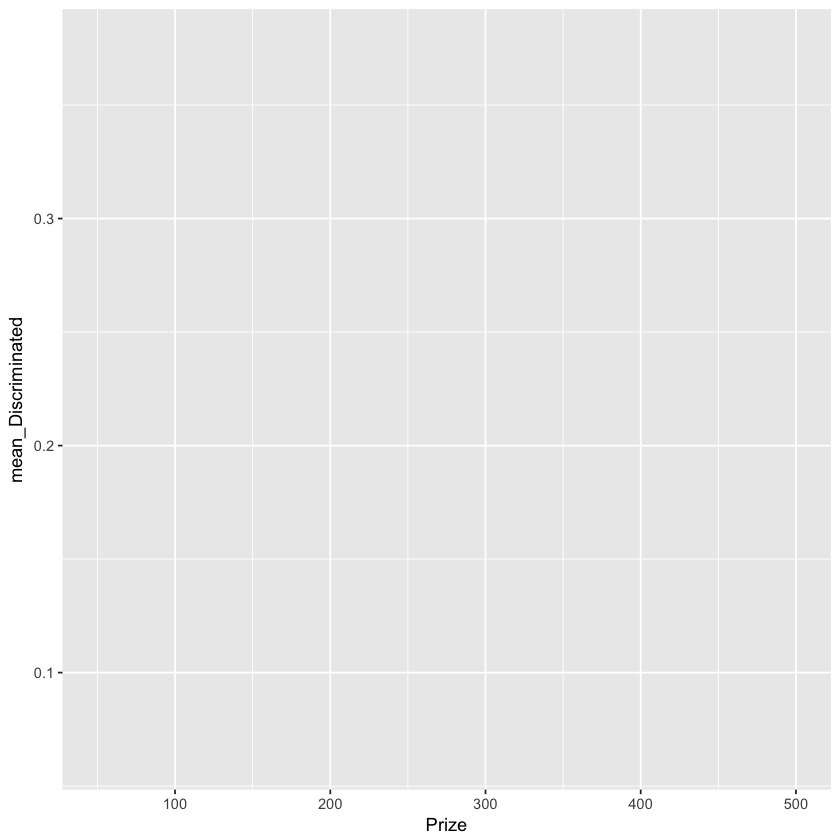

In [70]:
# Step 2: create a canvas and specify the aesthetic mapping

ggplot(aes(x = Prize, y = mean_Discriminated, 
                color = treatedClassroom, 
                shape = treatedClassroom,
                linetype = treatedClassroom), data = aea)

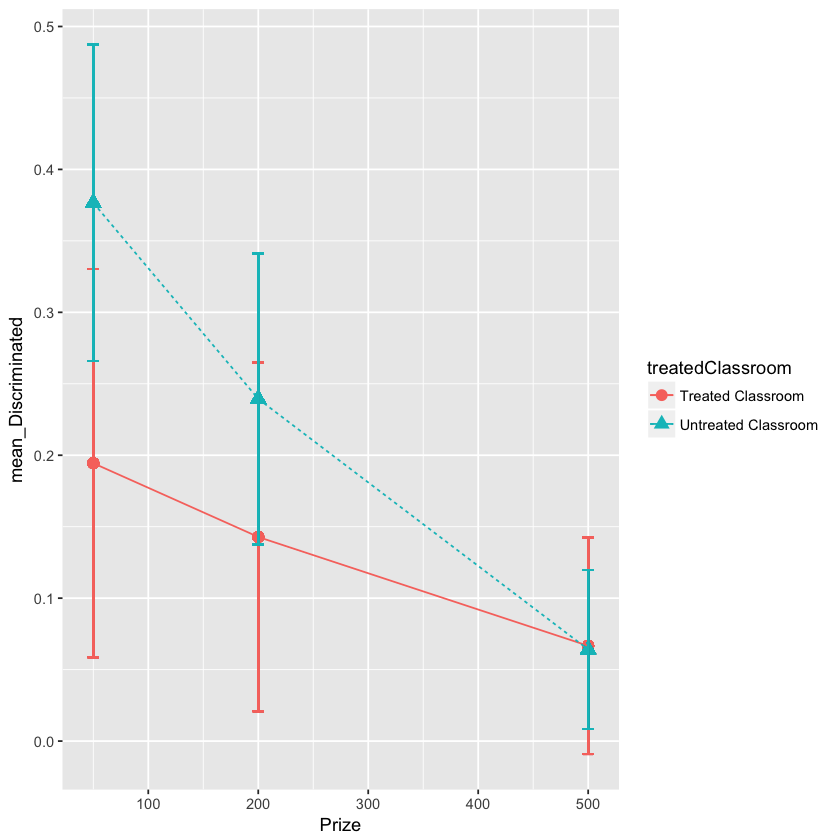

In [71]:
# Step 3: add the geometic objects

ggplot(aes(x = Prize, y = mean_Discriminated, 
                color = treatedClassroom, 
                shape = treatedClassroom,
                linetype = treatedClassroom), data = aea) +
  geom_point(size = 3) + 
  geom_line() +
  geom_errorbar(aes(ymin = lo_Discriminated, ymax = hi_Discriminated), linetype = 1, width = 10)

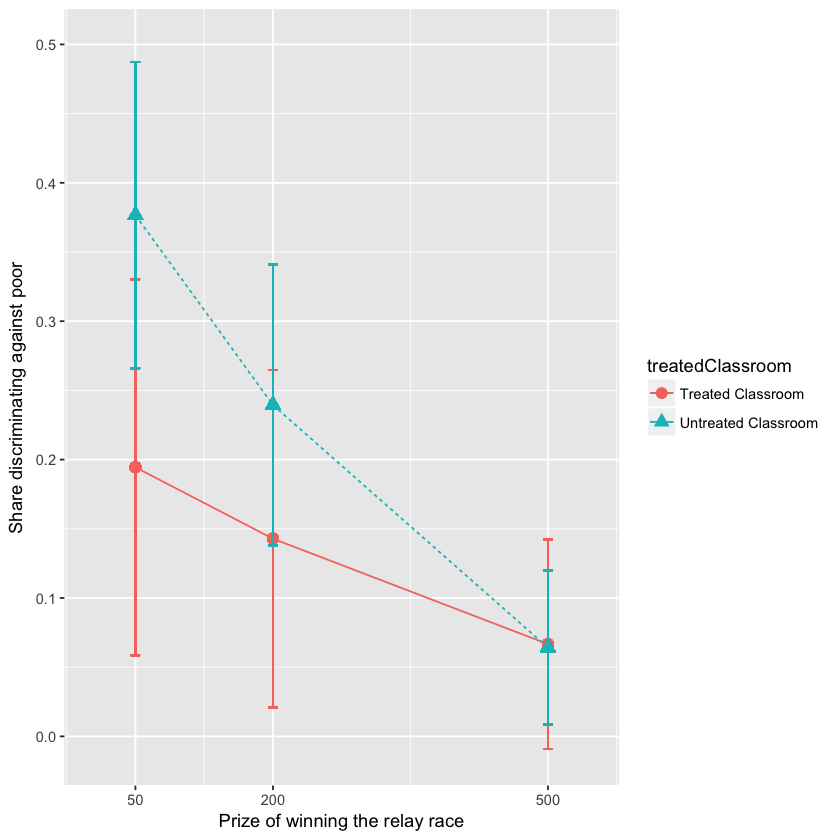

In [73]:
# Step 4: adjust the x-axis and y-axis

ggplot(aes(x = Prize, y = mean_Discriminated, 
                color = treatedClassroom, 
                shape = treatedClassroom,
                linetype = treatedClassroom), data = aea) +
  geom_point(size = 3) + 
  geom_line() +
  geom_errorbar(aes(ymin = lo_Discriminated, ymax = hi_Discriminated), linetype = 1, width = 10) +
  scale_x_continuous(name = "Prize of winning the relay race",
                     limits = c(0, 550),
                     breaks = c(50, 200, 500)) +
  scale_y_continuous(name = "Share discriminating against poor",
                     limits = c(-0.01, 0.5),
                     breaks = seq(0, 0.5, by = 0.1))

### Aesthetic settings (linetype, shape)
**the following figures are from the book: ggplot2 Elegant Graphics for Data Analysis by Hadley Wickham.**

![linetype](img\linetype.png) 
![shape](img\shape.png)

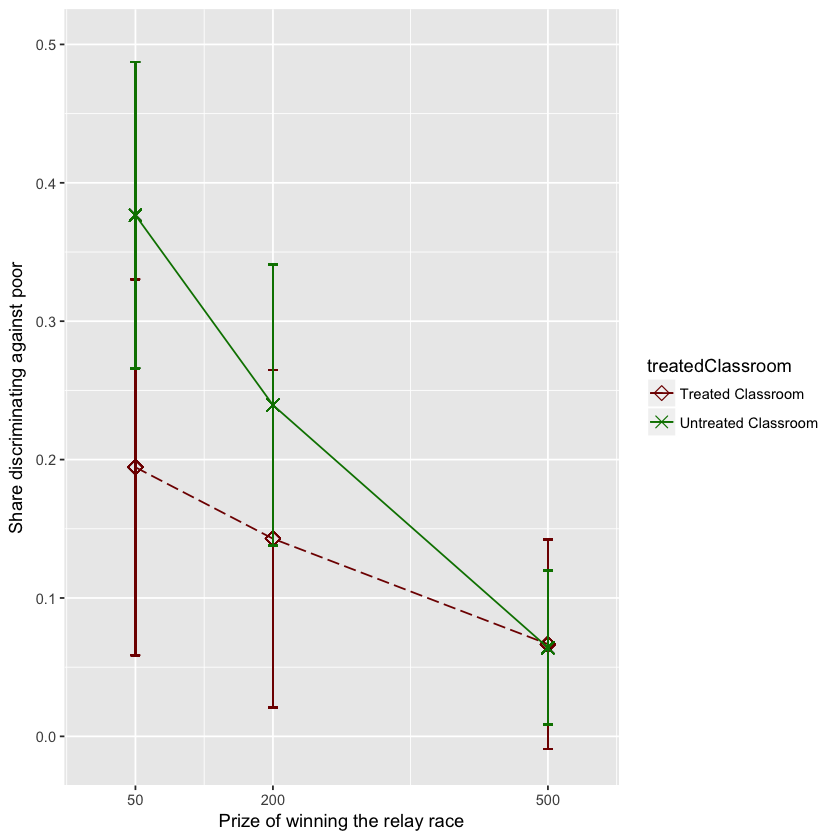

In [72]:
# Step 5: set the color, shape and linetype

ggplot(aes(x = Prize, y = mean_Discriminated, 
                color = treatedClassroom, 
                shape = treatedClassroom,
                linetype = treatedClassroom), data = aea) +
  geom_point(size = 3) + 
  geom_line() +
  geom_errorbar(aes(ymin = lo_Discriminated, ymax = hi_Discriminated), linetype = 1, width = 10) +
  scale_x_continuous(name = "Prize of winning the relay race",
                     limits = c(0, 550),
                     breaks = c(50, 200, 500)) +
  scale_y_continuous(name = "Share discriminating against poor",
                     limits = c(-0.01, 0.5),
                     breaks = seq(0, 0.5, by = 0.1)) +  
  scale_color_manual(values = c("#800000", "#008000")) +
  scale_linetype_manual(values = c("longdash", "solid")) +
  scale_shape_manual(values = c(23, 4))

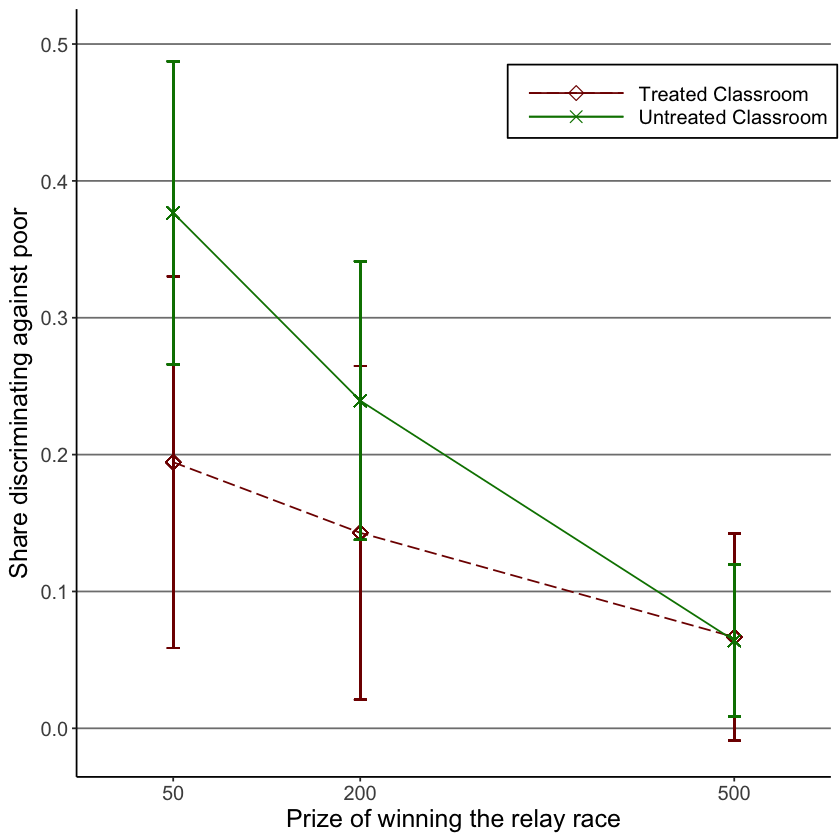

In [74]:
# Step 6: change the theme

ggplot(aes(x = Prize, y = mean_Discriminated, 
                color = treatedClassroom, 
                shape = treatedClassroom,
                linetype = treatedClassroom), data = aea) +
  geom_point(size = 3) + 
  geom_line() +
  geom_errorbar(aes(ymin = lo_Discriminated, ymax = hi_Discriminated), linetype = 1, width = 10) +
  scale_x_continuous(name = "Prize of winning the relay race",
                     limits = c(0, 550),
                     breaks = c(50, 200, 500)) +
  scale_y_continuous(name = "Share discriminating against poor",
                     limits = c(-0.01, 0.5),
                     breaks = seq(0, 0.5, by = 0.1)) +
  scale_color_manual(values = c("#800000", "#008000")) +
  scale_linetype_manual(values = c("longdash", "solid")) +
  scale_shape_manual(values = c(23, 4)) +
  theme(text = element_text(size = 15),
        panel.background = element_blank(),
        panel.grid.major = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.direction = "vertical",
        legend.position = c(0.79, 0.88),
        legend.background = element_rect(linetype = 1, size = 0.5, color = 1),
        legend.key.width = unit(2.5,"cm"),
        legend.key.height = unit(0.5,"cm"),
        legend.key = element_rect(fill = "white"),
        legend.title = element_blank(),
        panel.grid.major.y = element_line(color = "gray50", size = 0.5))

In [75]:
aea <- arrange(aea, desc(treatedClassroom))

Warning message:
“`show_guide` has been deprecated. Please use `show.legend` instead.”

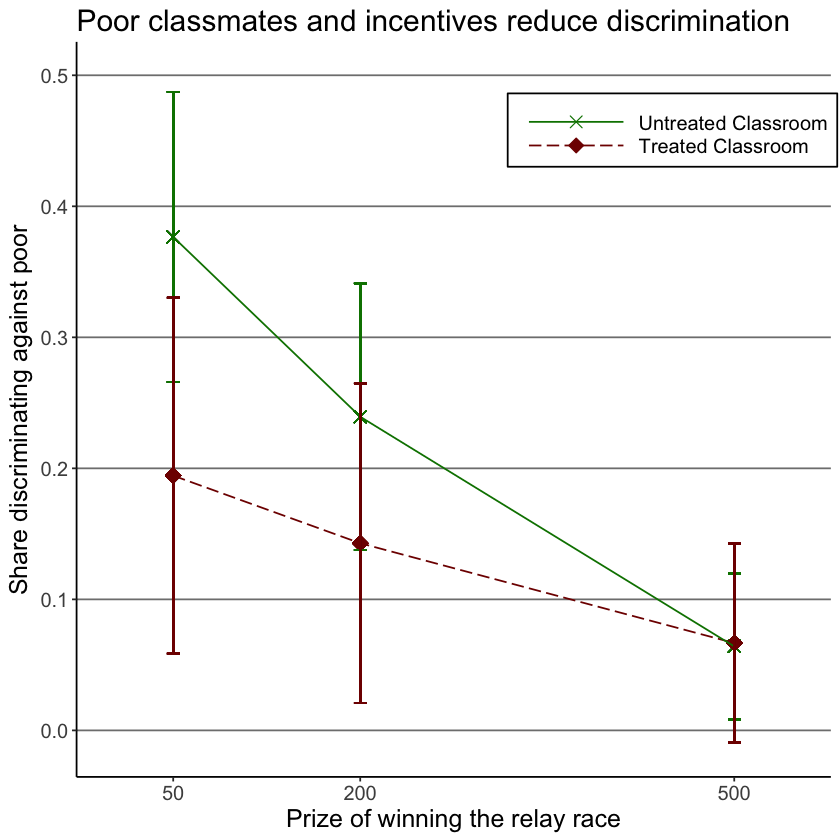

In [92]:
# Step 7: several minor adjustments

ggplot(aes(x = Prize, y = mean_Discriminated, 
                color = treatedClassroom, 
                shape = treatedClassroom,
                linetype = treatedClassroom), data = aea) +
  geom_point(size = 3, fill = c("#800000")) + 
  geom_line() +
  geom_errorbar(aes(ymin = lo_Discriminated, ymax = hi_Discriminated), linetype = 1, show_guide = F, width = 10) +
  scale_x_continuous(name = "Prize of winning the relay race",
                     limits = c(0, 550),
                     breaks = c(50, 200, 500)) +
  scale_y_continuous(name = "Share discriminating against poor",
                     limits = c(-0.01, 0.5),
                     breaks = seq(0, 0.5, by = 0.1)) +
  scale_color_manual(values = c("#800000", "#008000")) +
  scale_linetype_manual(values = c("longdash", "solid")) +
  scale_shape_manual(values = c(23, 4)) +
  theme(text = element_text(size = 15),
        panel.background = element_blank(),
        panel.grid.major = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.direction = "vertical",
        legend.position = c(0.79, 0.88),
        legend.background = element_rect(linetype = 1, size = 0.5, color = 1),
        legend.key.width = unit(2.5,"cm"),
        legend.key.height = unit(0.5,"cm"),
        legend.key = element_rect(fill = "white"),
        legend.title = element_blank(),
        panel.grid.major.y = element_line(color = "gray50", size = 0.5)) +
  guides(color = guide_legend(reverse = TRUE), 
         linetype = guide_legend(reverse = TRUE), 
         shape = guide_legend(reverse = TRUE)) +
  ggtitle("Poor classmates and incentives reduce discrimination")

![Rao_fig7](img\Rao_fig7.png)

In [97]:
ggsave("aea319.png", width = 8, height = 4)

## 4. Self-practice
* [AEA Char of the Week - Feb 13, 2019](https://www.aeaweb.org/research/charts/stimulus-impact-democratic-vote-share-new-jersey)
![chart213](img\chart213.png)